# **Análise de Condições para problemas cardiácos**
dataset do kaggle disponível em: https://www.kaggle.com/datasets/shriyashjagtap/stroke-diagnosis-and-health-metrics-data

# 0 Importações

## 0.1 Importação das bibliotecas

In [4]:
#Bibliotecas de manipulação de dados
import pandas as pd

#Bibliotecas de cálculos
import numpy as np
import math

#Bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 0.2 Carregamento dos dados

In [6]:
df_raw = pd.read_csv("stroke_data.csv")
df_raw.head()

,Age,Gender,SES,Hypertension,Heart_Disease,BMI,Avg_Glucose,Diabetes,Smoking_Status,Stroke
0,66.788137,Male,Medium,1,0,25.842521,96.428681,1,Current,1
1,86.393609,Female,Medium,1,1,32.531061,133.350068,0,Never,1
2,76.158579,Female,Medium,1,0,40.681244,111.489589,0,Never,0
3,72.477870,Female,Low,0,1,33.003193,125.692465,0,Former,0
4,59.881635,Male,Low,0,0,26.062443,123.218486,1,Never,1


# 1.0 Descrição dos dados

In [8]:
df1 = df_raw.copy()

- Age: idade do paciente
- Gender: sexo do paciente
- SES: status socioeconomico do paciente
- Hypertension: se o paciente teve hipertensão
- Heart_Disease: se o paciente tem problemas no coração
- BMI: IMC(índice de massa corporal)
- Avg_Glucose: nível médio de glícose
- Diabetes: se o paciente tem diabetes
- Smoking_Status: se o paciente é, foi ou nunca foi fumante
- Stroke: se o paciente teve AVC

## 1.1 Renomeando colunas

In [11]:
colunas = df1.columns
colunas_corrigidas = [x.lower() for x in colunas]
df1.columns = colunas_corrigidas
df1.columns

Index(['age', 'gender', 'ses', 'hypertension', 'heart_disease', 'bmi',
       'avg_glucose', 'diabetes', 'smoking_status', 'stroke'],
      dtype='object')

## 1.2 Dimensão dos dados

In [13]:
print(f"Linhas: {df1.shape[0]}\nColunas: {df1.shape[1]}")

Linhas: 10000
Colunas: 10


## 1.3 Tipo das colunas

In [15]:
df1.dtypes

age               float64
gender             object
ses                object
hypertension        int64
heart_disease       int64
bmi               float64
avg_glucose       float64
diabetes            int64
smoking_status     object
stroke              int64
dtype: object

### 1.3.1 Corrigindo tipos

In [17]:
#Age
df1['age'] = df1['age'].astype(int)

#Hypertension
replace_hyper = {0: "have", 1: "don't have"}
df1["hypertension"] = df1["hypertension"].map(replace_hyper)

#Heart_disease
replace_heart = {0: "healthy", 1: "unhealthy"}
df1["heart_disease"] =df1["heart_disease"].map(replace_heart)

#Diabetes
replace_diabetes = {0: "have", 1: "don't have"}
df1["diabetes"] = df1["diabetes"].map(replace_diabetes)

#Stroke
replace_stroke = {0: "not occurred", 1: "occurred"}
df1["stroke"] = df1["stroke"].map(replace_stroke)

In [18]:
df1.head()

,age,gender,ses,hypertension,heart_disease,bmi,avg_glucose,diabetes,smoking_status,stroke
0,66,Male,Medium,don't have,healthy,25.842521,96.428681,don't have,Current,occurred
1,86,Female,Medium,don't have,unhealthy,32.531061,133.350068,have,Never,occurred
2,76,Female,Medium,don't have,healthy,40.681244,111.489589,have,Never,not occurred
3,72,Female,Low,have,unhealthy,33.003193,125.692465,have,Former,not occurred
4,59,Male,Low,have,healthy,26.062443,123.218486,don't have,Never,occurred


## Checagem de NAs

In [20]:
df1.isna().sum()

age               0
gender            0
ses               0
hypertension      0
heart_disease     0
bmi               0
avg_glucose       0
diabetes          0
smoking_status    0
stroke            0
dtype: int64

## 1.5 Descrição dos dados

In [22]:
df_num = df1.select_dtypes( include=["int64", "float64"] )
df_cat = df1.select_dtypes( exclude=["int64", "float64"] )

### 1.5.1 Dados numéricos

In [24]:
medias = pd.DataFrame( df_num.apply( np.mean ) ).T 
medianas = pd.DataFrame( df_num.apply( np.median ) ).T 

In [25]:
desvio_padrao = pd.DataFrame( df_num.apply( np.std ) ).T
minimo = pd.DataFrame( df_num.apply( min ) ).T
maximo = pd.DataFrame( df_num.apply( max ) ).T
intervalo = pd.DataFrame( df_num.apply(lambda x: x.max() - x.min()) ).T
skew = pd.DataFrame( df_num.apply( lambda x: x.skew())).T 
kurtosis = pd.DataFrame( df_num.apply(lambda x: x.kurtosis() ) ).T

In [26]:
metricas_numericas = pd.concat( [minimo, maximo, intervalo, medias, medianas, desvio_padrao, skew, kurtosis] ).T.reset_index()
metricas_numericas.columns = (["atributos","minimo","maximo","intervalo","medias","medianas","desvio_padrao","skew","kurtosis"])

In [27]:
metricas_numericas

,atributos,minimo,maximo,intervalo,medias,medianas,desvio_padrao,skew,kurtosis
0,age,27.000000,99.000000,72.000000,69.261700,69.000000,9.873663,-0.035497,-0.064472
1,bmi,15.037988,47.495955,32.457968,28.042252,28.066932,4.901178,0.040075,-0.167643
2,avg_glucose,45.569135,176.180688,130.611553,109.115918,109.022208,16.420321,-0.024586,0.000201


### 1.5.2 Dados categóricos

In [29]:
df_cat.apply(lambda x: x.unique().shape[0])

gender            2
ses               3
hypertension      2
heart_disease     2
diabetes          2
smoking_status    3
stroke            2
dtype: int64

In [30]:
df2 = df1.copy()

In [31]:
df2.head()

,age,gender,ses,hypertension,heart_disease,bmi,avg_glucose,diabetes,smoking_status,stroke
0,66,Male,Medium,don't have,healthy,25.842521,96.428681,don't have,Current,occurred
1,86,Female,Medium,don't have,unhealthy,32.531061,133.350068,have,Never,occurred
2,76,Female,Medium,don't have,healthy,40.681244,111.489589,have,Never,not occurred
3,72,Female,Low,have,unhealthy,33.003193,125.692465,have,Former,not occurred
4,59,Male,Low,have,healthy,26.062443,123.218486,don't have,Never,occurred


In [32]:
df2 = df1.copy()

# 3.0 Analise exploratória

In [34]:
df2 = df1.copy()

## 4.1 Análise univariada

In [36]:
df_num = df2.select_dtypes( include=["int64", "float64"] )
df_cat = df2.select_dtypes( exclude=["int64", "float64"] )

### 4.1.1 Análise das variáveis numéricas

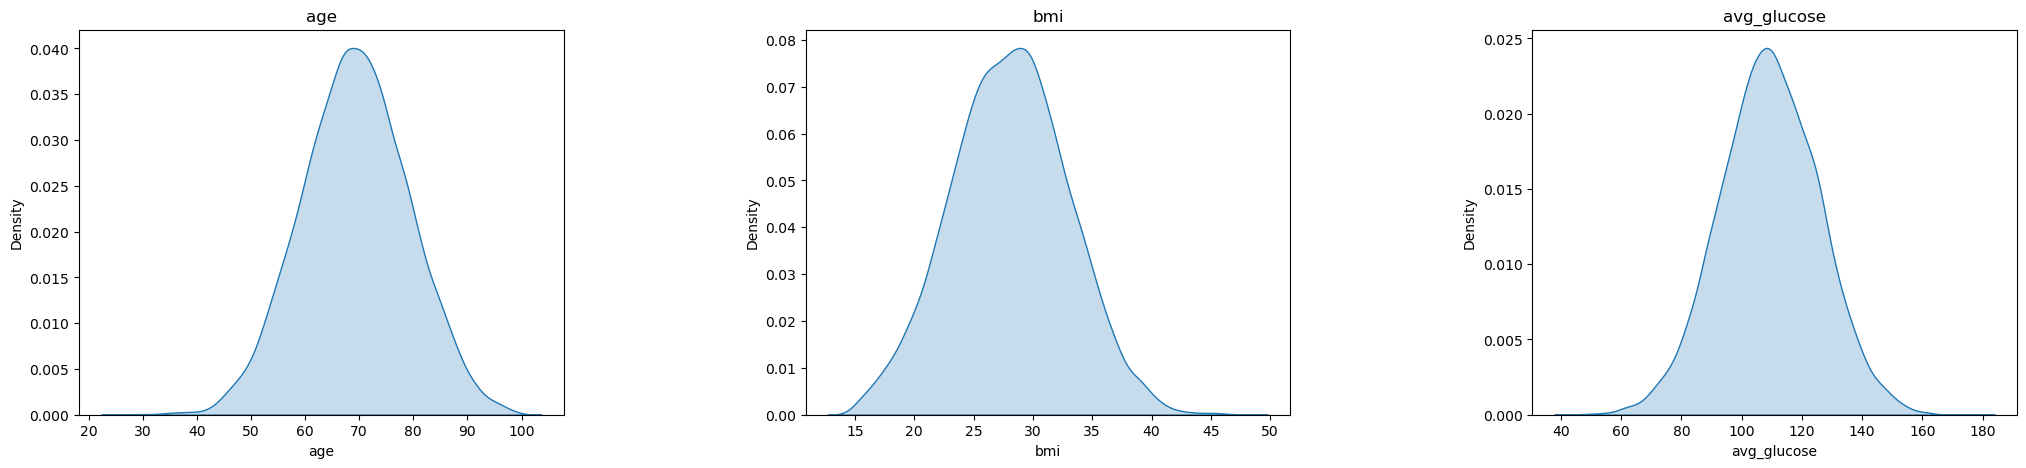

In [38]:
df_num_metade = df_num.iloc[:, :6]
continious_columns = df_num_metade.columns
rows = (len(continious_columns) + 1 )//3

columns = 3

fig,axes = plt.subplots(rows,columns,figsize=(25,5*rows))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.flatten()

for i,col in enumerate(continious_columns):
    sns.kdeplot(df_num_metade,x=str(col),ax=axes[i], fill=True)
    axes[i].set_title(col)

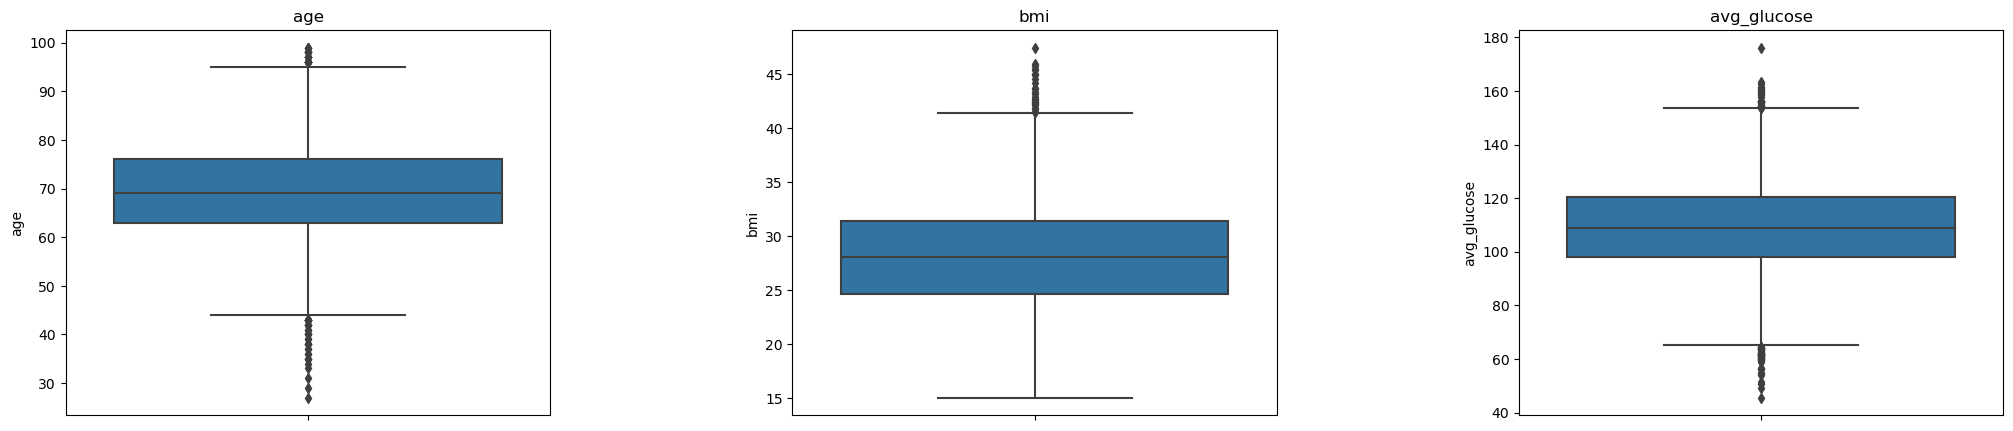

In [39]:
df_num_metade = df_num.iloc[:, :6]
continious_columns = df_num_metade.columns
rows = (len(continious_columns) + 1 )//3

columns = 3

fig,axes = plt.subplots(rows,columns,figsize=(25,5*rows))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
axes = axes.flatten()

for i,col in enumerate(continious_columns):
    sns.boxplot(df_num_metade,y=str(col),ax=axes[i])
    axes[i].set_title(col)

### 4.1.2 Análise das variáveis categoricas

<Axes: xlabel='hypertension', ylabel='count'>

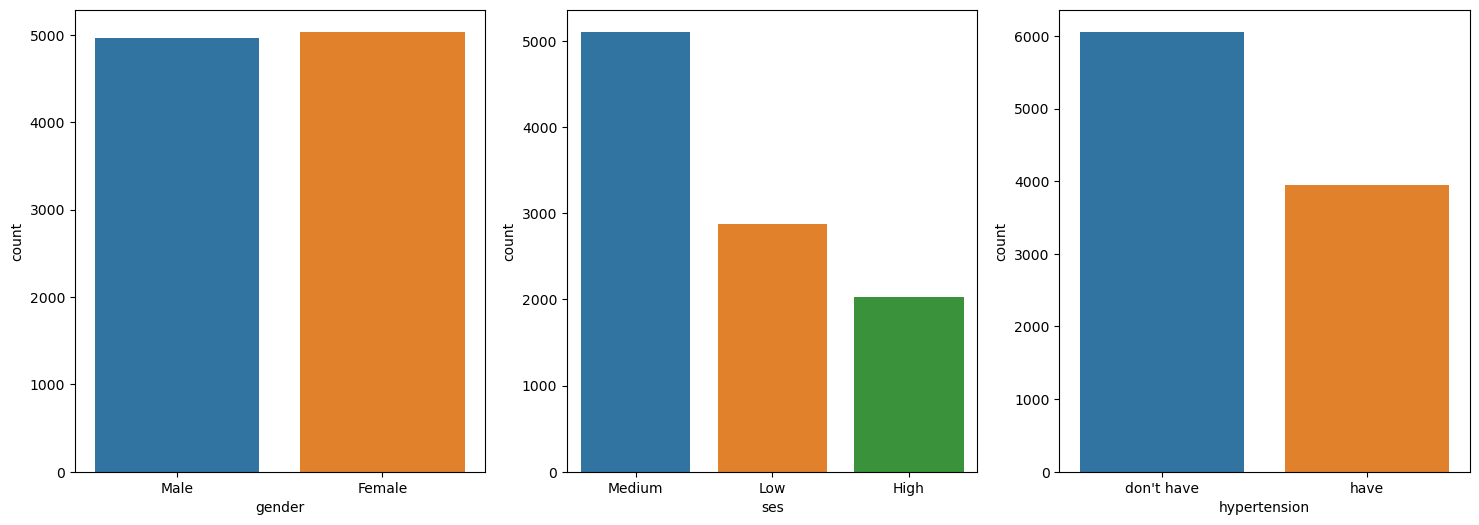

In [41]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.countplot(x='gender', data=df_cat)

plt.subplot(1,3,2)
sns.countplot(x = "ses", data=df_cat)

plt.subplot(1,3,3)
sns.countplot(x = "hypertension", data=df_cat)

<Axes: xlabel='stroke', ylabel='count'>

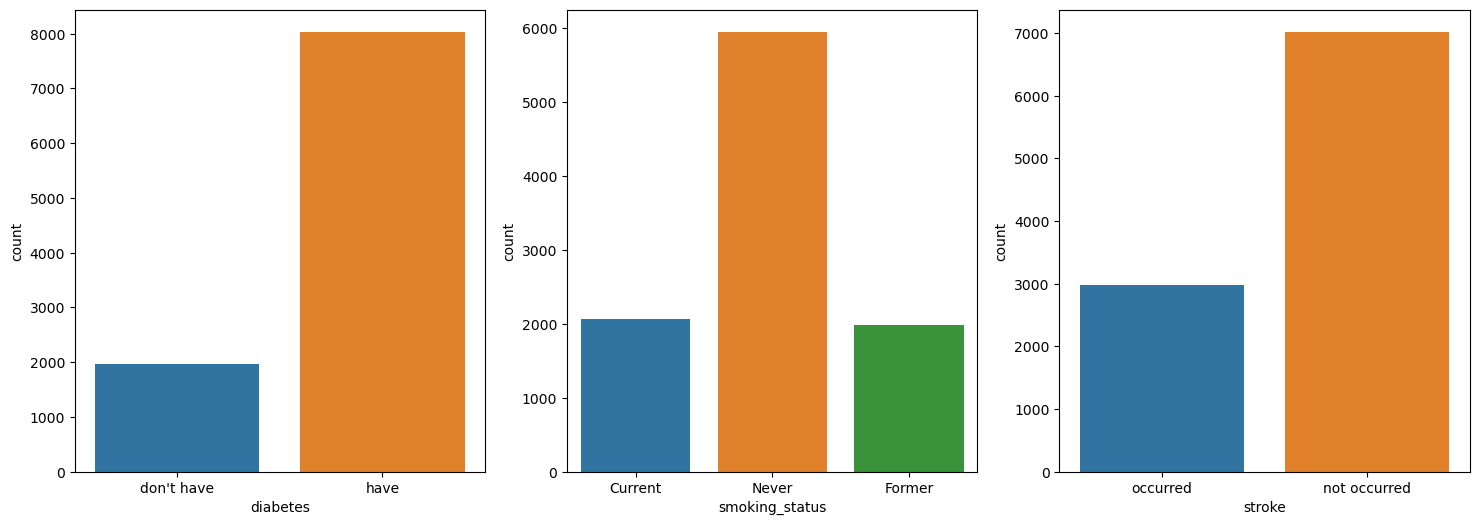

In [42]:
plt.figure(figsize=(18, 6))

plt.subplot(1,3,1)
sns.countplot(x='diabetes', data=df_cat)

plt.subplot(1,3,2)
sns.countplot(x = "smoking_status", data=df_cat)

plt.subplot(1,3,3)
sns.countplot(x = "stroke", data=df_cat)

## 4.2 Análise Bivariada

In [48]:
df3 = df2.copy()

### 4.2.1 Análise visando ocorrência de AVC